In [1]:
import cv2
import os
import glob
import argparse
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name2 = "HW4"  

cspins_f = np.loadtxt(f"./TD/data/cspins_{name2}_jl.txt")
seq_f    = np.loadtxt(f"./TD/data/seq_{name2}_jl.txt")
sneq_f   = np.loadtxt(f"./TD/data/sneq_{name2}_jl.txt")
sc_f     = np.loadtxt(f"./TD/data/sc_{name2}_jl.txt")
cc_f     = np.loadtxt(f"./TD/data/cc_{name2}_jl.txt")

In [3]:
def erase_images_from(directories, extensions=None):
    """
    Delete all files matching the given extensions in each directory.
    
    :param directories: list of directory paths
    :param extensions: list of file extensions (with leading dot), 
                       default ['.png', '.jpg', '.jpeg', '.tif', '.bmp']
    """
    if extensions is None:
        extensions = ['.png', '.jpg', '.jpeg', '.tif', '.bmp']
        
    for d in directories:
        for ext in extensions:
            pattern = os.path.join(d, f"*{ext}")
            for filepath in glob.glob(pattern):
                try:
                    os.remove(filepath)
                    # print(f"Deleted {filepath}")
                except Exception as e:
                    print(f"Could not delete {filepath}: {e}")

In [4]:
# ─── Configure output directory ───────────────────────────────────────────────
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
output_dir1 = os.path.join(parent_dir, "SPIN_ANIMATION", "EX-2-Damping", "Spin1")
output_dir2 = os.path.join(parent_dir, "SPIN_ANIMATION", "EX-2-Damping", "Spin2")
os.makedirs(output_dir1, exist_ok=True)
os.makedirs(output_dir2, exist_ok=True)
# ─── Choose a cold colormap once ──────────────────────────────────────────────
cmap   = plt.get_cmap('cool')
colors = cmap(np.linspace(0, 1, 4))  # sample 4, we only use the first 3
print(output_dir1)
print(output_dir2)

c:\Users\nicol\OneDrive\Documents\ACADEMY\2025\SPIN_ANIMATION\EX-2-Damping\Spin1
c:\Users\nicol\OneDrive\Documents\ACADEMY\2025\SPIN_ANIMATION\EX-2-Damping\Spin2


In [5]:
# ─── Function to make & save one spin plot ───────────────────────────────────
def save_spin_plot(time_step,nspin,output_dir, ii=1):
    fig = plt.figure(figsize=(1024/100, 300/100), dpi=100)

    # plot up to this time_step
    t = sneq_f[:time_step, 0]
    sx = sneq_f[:time_step, ii]
    sy = sneq_f[:time_step, ii+1]
    sz = sneq_f[:time_step, ii+2]

    plt.plot(t, sx, label=r"$S_x$", color=colors[0])
    plt.plot(t, sy, label=r"$S_y$", color=colors[1])
    plt.plot(t, sz, label=r"$S_z$", color=colors[2])

    plt.xlabel("Time (fs)")
    plt.ylabel("Expectation value of the spin")
    plt.title(f"$S_{nspin}$: Spin density out of equilibrium")
    plt.xlim(0, 1000)
    plt.legend(loc='upper right')
    plt.tight_layout()

    # save and close
    fname = os.path.join(output_dir, f"{time_step:04d}.png")
    fig.savefig(fname)
    plt.close(fig)

In [ ]:
# ─── Loop over all steps and save each image ─────────────────────────────────
total_steps = sneq_f.shape[0]           # or set your own integer here
for ts in range(3388, total_steps + 1):
    save_spin_plot(ts,1,output_dir1,1)
    save_spin_plot(ts,2,output_dir2,4)

print(f"Saved {total_steps} images to:\n{output_dir1}")

# ERASE IMAGES!!!

In [7]:
erase_images_from([output_dir1, output_dir2])
print("All images erased from Spin1 and Spin2.")

All images erased from Spin1 and Spin2.


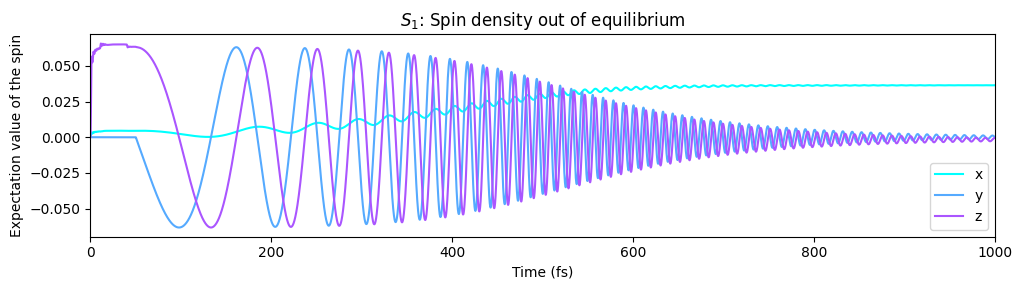

In [21]:
fig = plt.figure(figsize=(1024/100, 300/100), dpi=100)

# -- Choose a "cold" colormap and sample 3 distinct colors --
cmap = plt.get_cmap('cool')
colors = cmap(np.linspace(0, 1, 4))
time_step= 10000

# -- Plot each spin component with a cold color --
plt.plot(sneq_f[0:time_step, 0], sneq_f[0:time_step, 1], label="x", color=colors[0])
plt.plot(sneq_f[0:time_step, 0], sneq_f[0:time_step, 2], label="y", color=colors[1])
plt.plot(sneq_f[0:time_step, 0], sneq_f[0:time_step, 3], label="z", color=colors[2])

plt.xlabel("Time (fs)")
plt.ylabel("Expectation value of the spin")
plt.title(f"$S_1$: Spin density out of equilibrium")
plt.xlim(0, 1000)
plt.legend()
plt.tight_layout()
plt.show()

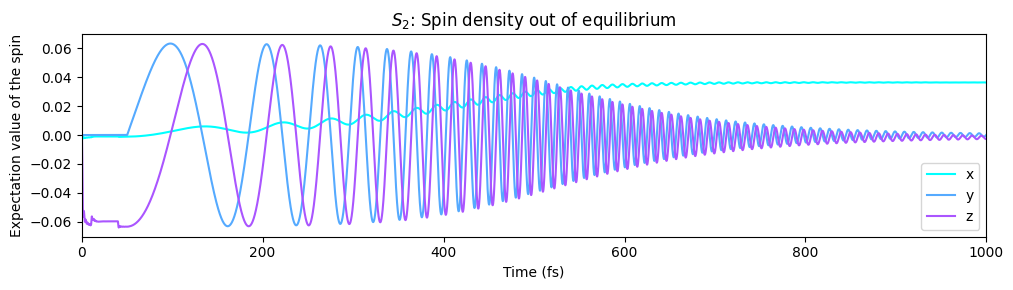

In [26]:
fig = plt.figure(figsize=(1024/100, 300/100), dpi=100)

# -- Choose a "cold" colormap and sample 3 distinct colors --
cmap = plt.get_cmap('cool')
colors = cmap(np.linspace(0, 1, 4))
time_step= 10000

# -- Plot each spin component with a cold color --
plt.plot(sneq_f[0:time_step, 0], sneq_f[0:time_step, 4], label="x", color=colors[0])
plt.plot(sneq_f[0:time_step, 0], sneq_f[0:time_step, 5], label="y", color=colors[1])
plt.plot(sneq_f[0:time_step, 0], sneq_f[0:time_step, 6], label="z", color=colors[2])

plt.xlabel("Time (fs)")
plt.ylabel("Expectation value of the spin")
plt.title(f"$S_2$: Spin density out of equilibrium")
plt.xlim(0, 1000)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
sneq_f.shape[0]

10000

In [5]:
def images_to_video(image_folder, output_path, fps=24):
    """
    Create a video file from a sequence of PNG images in a folder.

    :param image_folder: Path to the folder containing images named numerically (e.g., 0001.png).
    :param output_path: Path (including filename) where the output video will be saved.
    :param fps: Frames per second for the output video.
    """
    # Find all PNG images in the folder and sort them
    image_paths = sorted(glob.glob(os.path.join(image_folder, '*.png')))
    if not image_paths:
        raise ValueError(f"No PNG images found in {image_folder}")

    # Read the first image to get dimensions
    first_frame = cv2.imread(image_paths[0])
    height, width, channels = first_frame.shape

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # For .mp4 output
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Iterate over images and write to video
    for img_path in image_paths:
        frame = cv2.imread(img_path)
        if frame is None:
            print(f"Warning: could not read {img_path}, skipping.")
            continue
        # Ensure frame size matches
        if frame.shape[0] != height or frame.shape[1] != width:
            frame = cv2.resize(frame, (width, height))
        video_writer.write(frame)

    # Release the video writer
    video_writer.release()
    print(f"Video saved to {output_path}")

In [5]:
images_to_video(
    image_folder='../SPIN_ANIMATION/BLENDER/EX-2-Damping',
    output_path='VideoSpin.mp4',
    fps=24
)


Video saved to VideoSpin.mp4


# Merge Images

In [6]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from PIL import Image

# ─── Step 1: Define parent and input/output folders ────────────────────────────
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

output_dir1 = os.path.join(parent_dir, "SPIN_ANIMATION", "EX-2-Damping", "Spin1")
output_dir2 = os.path.join(parent_dir, "SPIN_ANIMATION", "EX-2-Damping", "Spin2")
output_dir3 = os.path.join(parent_dir, "SPIN_ANIMATION", "EX-2-Damping", "Blender")

merged_dir = os.path.join(parent_dir, "SPIN_ANIMATION", "EX-2-Damping", "MergeVideo")
os.makedirs(merged_dir, exist_ok=True)

# ─── Step 2: Merge function ─────────────────────────────────────────────────────
def merge_three_images_vertically(name):
    path1 = os.path.join(output_dir1, name)
    path2 = os.path.join(output_dir2, name)
    path3 = os.path.join(output_dir3, name)

    img1 = Image.open(path1)
    img2 = Image.open(path2)
    img3 = Image.open(path3)

    # Ensure all images are same width
    width = img1.width
    assert img2.width == width and img3.width == width, "Widths must match"

    total_height = img1.height + img3.height + img2.height

    merged_img = Image.new("RGB", (width, total_height))

    # Paste: top = Spin1, middle = Spin3, bottom = Spin2
    merged_img.paste(img1, (0, 0))
    merged_img.paste(img2, (0, img1.height))
    merged_img.paste(img3, (0, img1.height + img2.height))

    save_path = os.path.join(merged_dir, name)
    merged_img.save(save_path)

# ─── Step 3: Loop over all image names ──────────────────────────────────────────
total_images = 10000

for i in range(1,total_images):
    filename = f"{i:04d}.png"
    try:
        merge_three_images_vertically(filename)
    except Exception as e:
        print(f"Failed to merge {filename}: {e}")

print(f"Merged {total_images} images into:\n{merged_dir}")


Merged 10000 images into:
c:\Users\nicol\OneDrive\Documents\ACADEMY\2025\SPIN_ANIMATION\EX-2-Damping\MergeVideo


# FINAL VIDEO

In [1]:
import os
import subprocess

# ─── Paths ──────────────────────────────────────────────────────────────
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
image_dir = os.path.join(parent_dir, "SPIN_ANIMATION", "EX-2-Damping", "MergeVideo")
output_video = os.path.join(image_dir, "spin_fast.mp4")

# ─── Compute fps for 1-minute video ─────────────────────────────────────
total_images = 10000
target_duration_seconds = 60  # 1 minute
fps = total_images / target_duration_seconds  # ≈ 166.67

# ─── FFmpeg command to create the video ─────────────────────────────────
cmd = [
    "ffmpeg",
    "-framerate", str(fps),
    "-i", os.path.join(image_dir, "%04d.png"),
    "-c:v", "libx264",
    "-pix_fmt", "yuv420p",
    "-crf", "18",              # high quality
    "-preset", "fast",         # encoding speed vs compression tradeoff
    output_video
]

# ─── Run command ────────────────────────────────────────────────────────
subprocess.run(cmd)

print(f"✅ Video created at {output_video}")


✅ Video created at c:\Users\nicol\OneDrive\Documents\ACADEMY\2025\SPIN_ANIMATION\EX-2-Damping\MergeVideo\spin_fast.mp4
